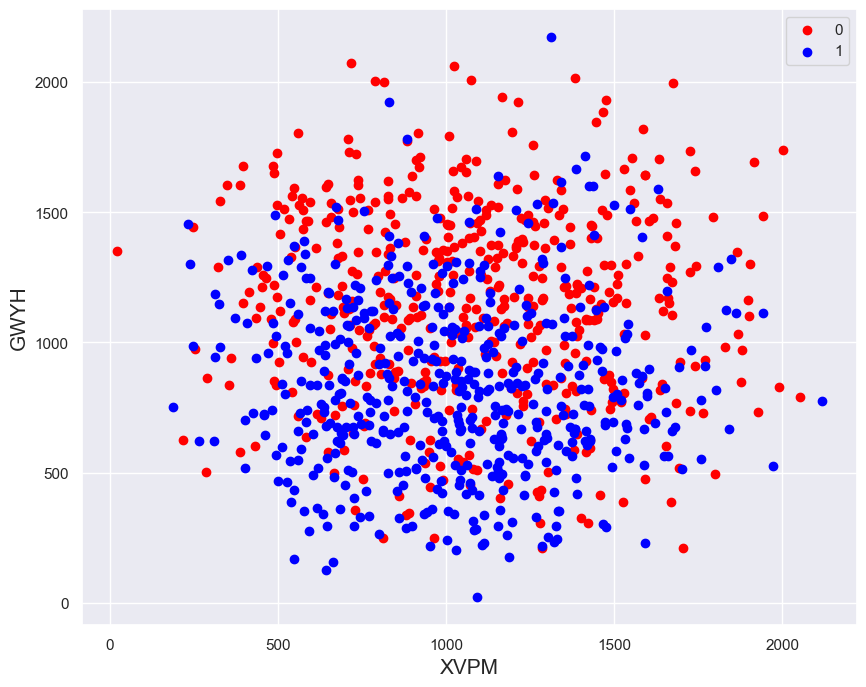

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
data = pd.read_csv('~/Downloads/KNN_Project_Data.txt', sep=",")

X = data[['XVPM', 'GWYH']].values  # Replace with your actual feature column names
y = data['TARGET CLASS']  # Replace with your actual target column name


# Define labeling function
def make_labels(y):
    if y == 0:
        return 0
    else:
        return 1
         
# Create target value array
y = data['TARGET CLASS'].map(make_labels).to_numpy()

# Plot the data
Status = [0,1]
colors = ["red", "Blue"]

fig, ax = plt.subplots(figsize=(10, 8))
for species, color in zip(Status, colors):
    temp_df = data[data["TARGET CLASS"] == species]  # Use species variable here
    ax.scatter(temp_df.XVPM,
               temp_df.GWYH,
               c=color,
               label=species)  # Use species for the label
    
# Set labels and legend
ax.set_xlabel("XVPM", fontsize=15)
ax.set_ylabel("GWYH", fontsize=15)
ax.legend()

plt.show()

In [3]:
# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# import ensemble method 
from sklearn.ensemble import VotingClassifier

# split training data 
from sklearn.model_selection import train_test_split

# import metric 
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 9)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
        estimators=[("lr", log_clf), ("rf", rnd_clf), ("svm", svm_clf)],
        voting = "hard"
    )

svm_clf.fit(X_train, y_train)
svm_y_predict = svm_clf.predict(X_test)
print(f"svm accuracy: {accuracy_score(y_test, svm_y_predict)}")

log_clf.fit(X_train, y_train)
log_y_predict = log_clf.predict(X_test)
print(f"logistic regression accuracy: {accuracy_score(y_test, log_y_predict)}")

rnd_clf.fit(X_train, y_train)
rnd_y_predict = rnd_clf.predict(X_test)
print(f"random forest accuracy: {accuracy_score(y_test, rnd_y_predict)}")

voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
print(f"voting classifier accuracy: {accuracy_score(y_test, y_predict)}")

svm accuracy: 0.6575
logistic regression accuracy: 0.68
random forest accuracy: 0.615
voting classifier accuracy: 0.6525


In [4]:
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 6)

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       198
           1       0.65      0.71      0.68       202

    accuracy                           0.66       400
   macro avg       0.66      0.66      0.66       400
weighted avg       0.66      0.66      0.66       400
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.60      0.68      0.64       198
           1       0.64      0.55      0.59       202

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.62      0.62       400
 



In [5]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       198
           1       0.65      0.71      0.68       202

    accuracy                           0.66       400
   macro avg       0.66      0.66      0.66       400
weighted avg       0.66      0.66      0.66       400
 



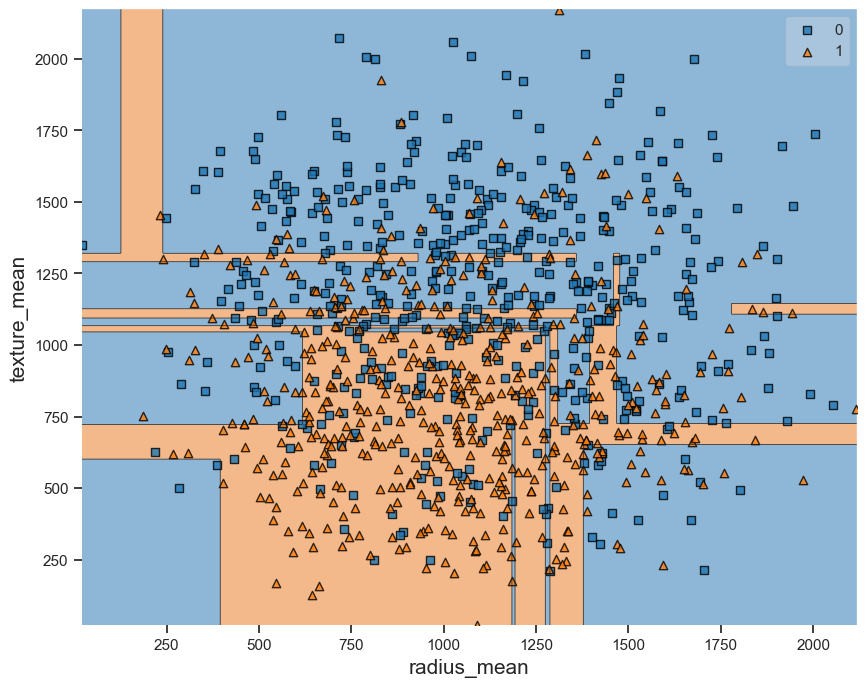

In [6]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("radius_mean", fontsize = 15)
plt.ylabel("texture_mean", fontsize = 15)
plt.grid()
plt.show()


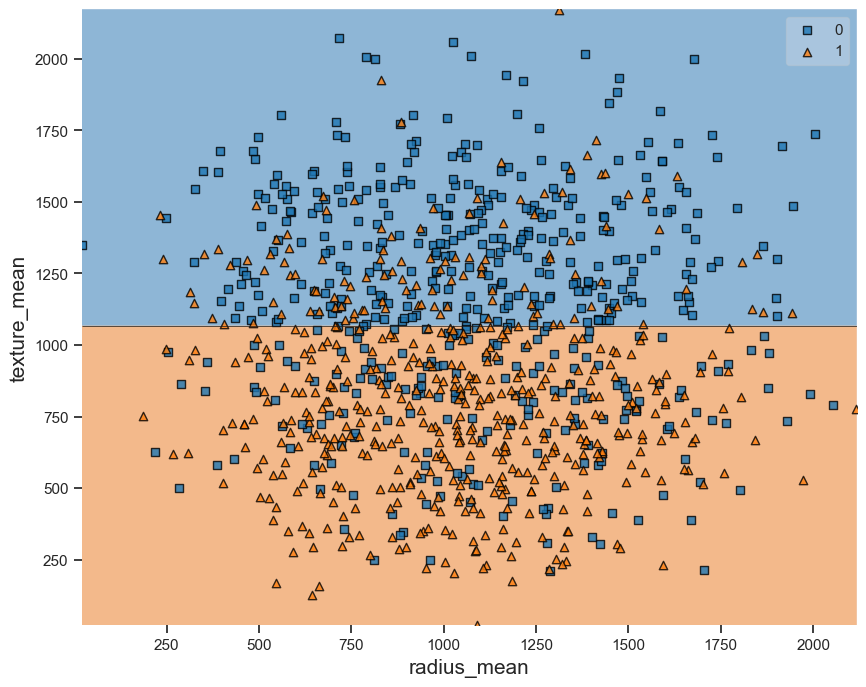

In [7]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("radius_mean", fontsize = 15)
plt.ylabel("texture_mean", fontsize = 15)
plt.grid()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 5)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       193
           1       0.59      0.61      0.60       207

    accuracy                           0.58       400
   macro avg       0.58      0.58      0.58       400
weighted avg       0.58      0.58      0.58       400
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       193
           1       0.69      0.77      0.73       207

    accuracy                           0.70       400
   macro avg       0.71      0.70      0.70       400
weighted avg       0.71      0.70      0.70       400
 



In [9]:
forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       193
           1       0.69      0.77      0.73       207

    accuracy                           0.70       400
   macro avg       0.71      0.70      0.70       400
weighted avg       0.71      0.70      0.70       400
 



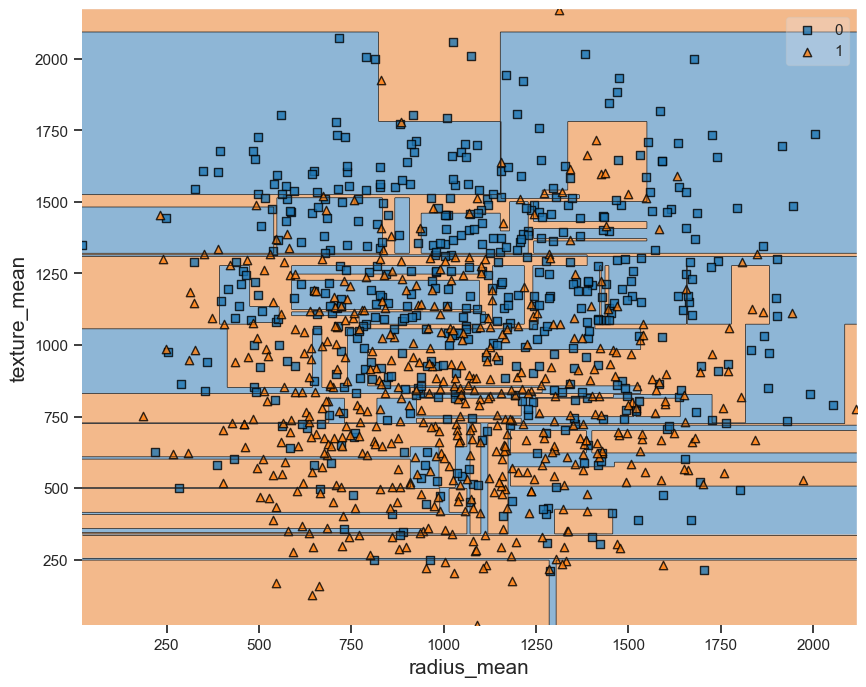

In [10]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("radius_mean", fontsize = 15)
plt.ylabel("texture_mean", fontsize = 15)
plt.grid()
plt.show()

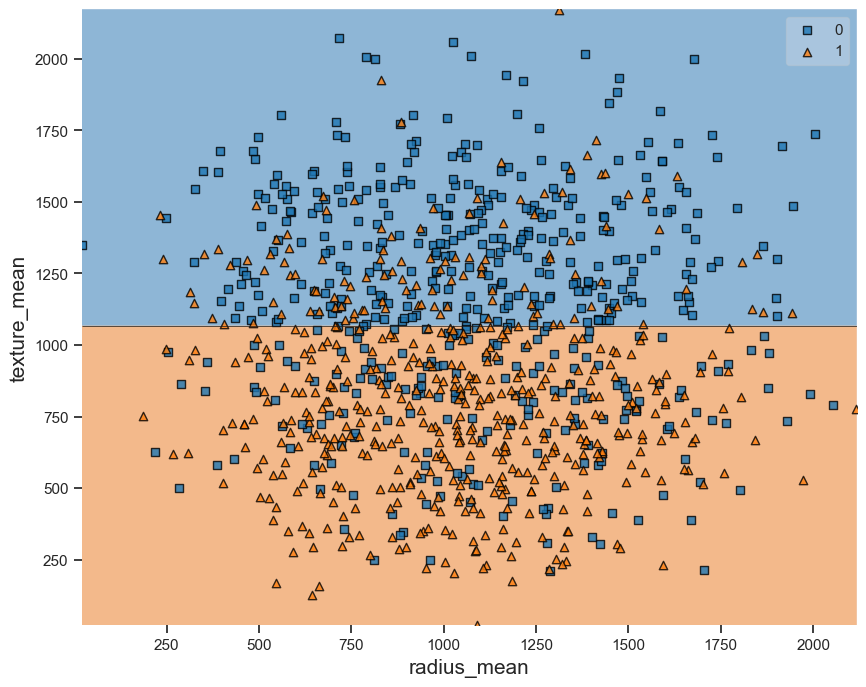

In [11]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("radius_mean", fontsize = 15)
plt.ylabel("texture_mean", fontsize = 15)
plt.grid()
plt.show()

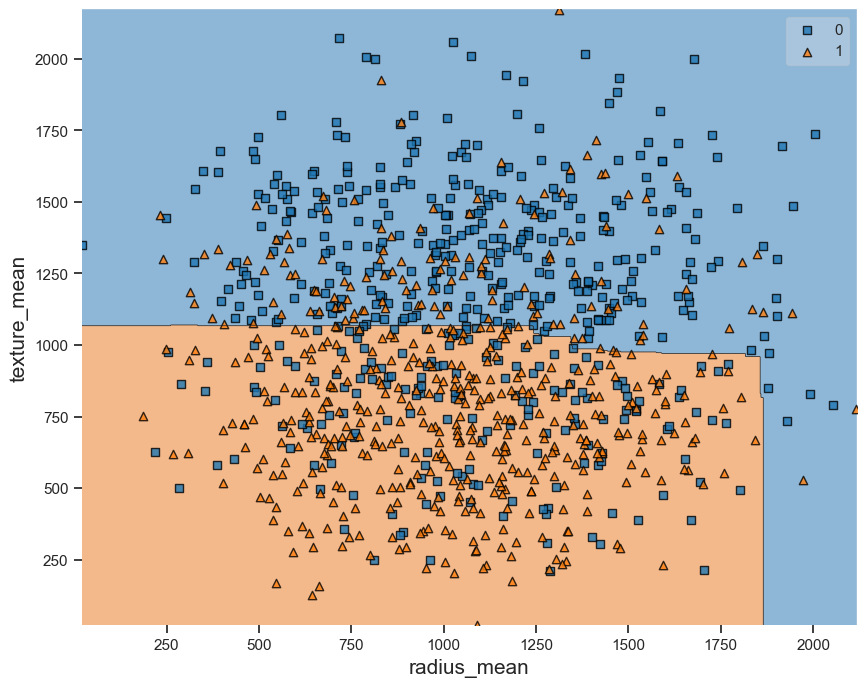

In [12]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("radius_mean", fontsize = 15)
plt.ylabel("texture_mean", fontsize = 15)
plt.grid()
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier

X = data[["XVPM","GWYH","TRAT","TLLZ"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 5)



tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       193
           1       0.73      0.69      0.71       207

    accuracy                           0.70       400
   macro avg       0.71      0.71      0.70       400
weighted avg       0.71      0.70      0.71       400
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       193
           1       0.76      0.68      0.72       207

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.72       400
weighted avg       0.73      0.72      0.72       400
 



In [15]:
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       193
           1       0.76      0.68      0.72       207

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.72       400
weighted avg       0.73      0.72      0.72       400
 



In [16]:
forest_clf = RandomForestClassifier(max_depth = 3, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       193
           1       0.76      0.68      0.72       207

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.72       400
weighted avg       0.73      0.72      0.72       400
 



In [17]:
names = ["XVPM","GWYH","TRAT","TLLZ"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

XVPM 0.03464503825262952
GWYH 0.3626181437693121
TRAT 0.5225488619207189
TLLZ 0.08018795605733939
